In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-18--17h-22m-30s',
 '2025-06-18--17h-24m-21s',
 '2025-06-18--17h-26m-05s',
 '2025-06-18--17h-27m-49s',
 '2025-06-18--17h-29m-32s',
 '2025-06-18--17h-31m-14s',
 '2025-06-18--17h-32m-56s',
 '2025-06-18--17h-34m-40s',
 '2025-06-18--17h-36m-21s',
 '2025-06-18--17h-38m-04s',
 '2025-06-18--17h-39m-47s',
 '2025-06-18--17h-41m-29s',
 '2025-06-18--17h-43m-12s',
 '2025-06-18--17h-44m-55s',
 '2025-06-18--17h-46m-54s',
 '2025-06-18--17h-48m-38s',
 '2025-06-18--17h-50m-20s',
 '2025-06-18--17h-52m-02s',
 '2025-06-18--17h-53m-45s',
 '2025-06-18--17h-55m-30s',
 '2025-06-18--17h-57m-15s',
 '2025-06-18--17h-59m-00s',
 '2025-06-18--18h-00m-44s',
 '2025-06-18--18h-02m-28s',
 '2025-06-18--18h-04m-12s',
 '2025-06-18--18h-05m-54s',
 '2025-06-18--18h-07m-38s',
 '2025-06-18--18h-09m-37s',
 '2025-06-18--18h-11m-21s',
 '2025-06-18--18h-13m-04s',
 '2025-06-18--18h-14m-50s',
 '2025-06-18--18h-16m-34s',
 '2025-06-18--18h-18m-20s',
 '2025-06-18--18h-20m-06s',
 '2025-06-18--18h-21m-51s',
 '2025-06-18--18h-23

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "corrected_estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "corrected_estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
0,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
1,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
2,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
3,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
4,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
100884,2025-06-18--19h-14m-43s,62.0,52.0,51.0,35.0,200.0,1.485694,0.834893,0.834893,1.570796,1.570796
100885,2025-06-18--19h-14m-43s,41.0,60.0,46.0,53.0,200.0,1.535789,0.756208,0.756208,1.570796,1.570796
100886,2025-06-18--19h-14m-43s,53.0,55.0,49.0,43.0,200.0,1.510760,0.805310,0.805310,1.570796,1.570796
100887,2025-06-18--19h-14m-43s,49.0,55.0,44.0,52.0,200.0,1.555796,0.812703,0.812703,1.570796,1.570796


In [5]:
estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]

/tmp/ipykernel_1087727/3925035558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]


,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
1517,2025-06-18--17h-22m-30s,115.0,26365.0,119.0,1.0,26600.0,0.133307,0.776721,0.776721,0.0,0.000000
21630,2025-06-18--17h-44m-55s,123.0,26707.0,130.0,0.0,26960.0,0.137106,0.771352,0.771352,0.0,0.785398
41803,2025-06-18--18h-07m-38s,151.0,27449.0,120.0,0.0,27720.0,0.139945,0.843596,0.843596,0.0,1.570796


# Load Theory Curves

In [6]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [7]:
delta_phi_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats.csv'))
delta_phi_theory

,delta_phi,theta,n,delta_phi_estimator_mean,delta_phi_estimator_variance
0,0.000000,0.785398,40,0.000000,0.000000
1,0.003142,0.785398,40,0.000031,0.000010
2,0.006283,0.785398,40,0.000126,0.000041
3,0.009425,0.785398,40,0.000283,0.000092
4,0.012566,0.785398,40,0.000503,0.000164
...,...,...,...,...,...
7510,1.558230,1.570796,200,1.569223,0.000156
7511,1.561372,1.570796,200,1.569909,0.000088
7512,1.564513,1.570796,200,1.570402,0.000039
7513,1.567655,1.570796,200,1.570698,0.000010


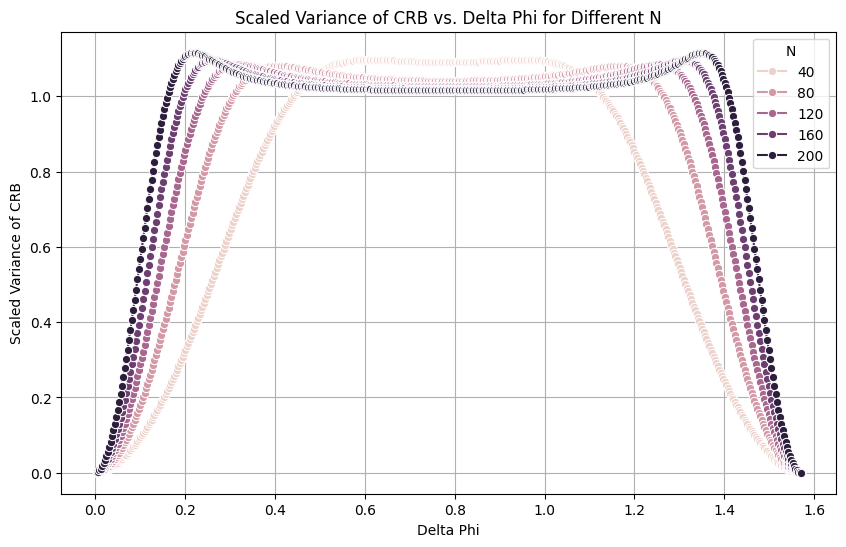

In [8]:
overlap_adjusted_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'phase_estimation_multiN.csv'))
overlap_adjusted_theory = overlap_adjusted_theory[overlap_adjusted_theory["nu"] == 0.985]

# Plot VarCRB_scaled against delta_phi for each N from overlap_adjusted_theory
def plot_varcrb_scaled_vs_delta_phi(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="delta_phi", y="VarCRB_scaled", hue="N", marker="o")
    plt.title("Scaled Variance of CRB vs. Delta Phi for Different N")
    plt.xlabel("Delta Phi")
    plt.ylabel("Scaled Variance of CRB")
    plt.legend(title="N", loc='upper right')
    plt.grid(True)
    plt.show()
plot_varcrb_scaled_vs_delta_phi(overlap_adjusted_theory)

# Theta

In [9]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: 0 if x > 200 else round(x / 40) * 40)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
1,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
2,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
3,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
4,2025-06-18--17h-22m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
100884,2025-06-18--19h-14m-43s,62.0,52.0,51.0,35.0,200.0,1.485694,0.834893,0.834893,1.570796,1.570796,200
100885,2025-06-18--19h-14m-43s,41.0,60.0,46.0,53.0,200.0,1.535789,0.756208,0.756208,1.570796,1.570796,200
100886,2025-06-18--19h-14m-43s,53.0,55.0,49.0,43.0,200.0,1.510760,0.805310,0.805310,1.570796,1.570796,200
100887,2025-06-18--19h-14m-43s,49.0,55.0,44.0,52.0,200.0,1.555796,0.812703,0.812703,1.570796,1.570796,200


In [10]:
theta_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.072977,0.111957,0.012534,665,0.797728,0.046133,0.002128
1,40.0,0.000000,0.785398,0.075526,0.114872,0.013196,674,0.773960,0.086568,0.007494
2,40.0,0.000000,1.570796,0.078711,0.116158,0.013493,693,0.759506,0.063236,0.003999
3,40.0,0.261799,0.000000,0.251477,0.146455,0.021449,662,0.779083,0.147777,0.021838
4,40.0,0.261799,0.785398,0.230831,0.143638,0.020632,681,0.770504,0.124560,0.015515
...,...,...,...,...,...,...,...,...,...,...
355,28400.0,2.356194,0.000000,2.317071,NaN,NaN,1,0.788242,NaN,NaN
356,28520.0,2.094395,0.000000,2.060468,NaN,NaN,1,0.775088,NaN,NaN
357,28560.0,0.785398,0.000000,0.787524,NaN,NaN,1,0.800013,NaN,NaN
358,28560.0,0.785398,1.570796,0.787079,NaN,NaN,1,0.792778,NaN,NaN


## Mean

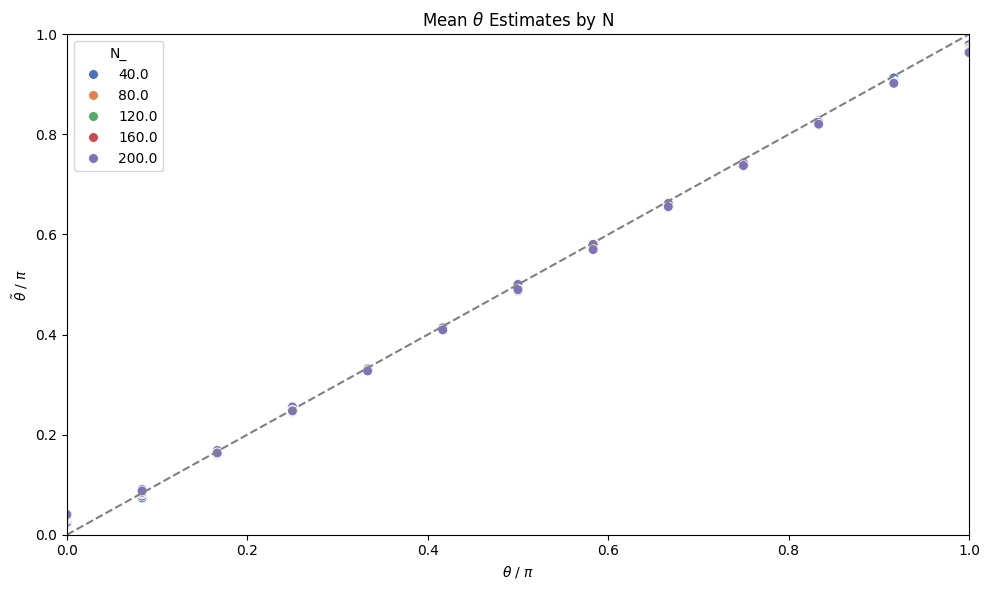

In [11]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Error

### Uncompensated

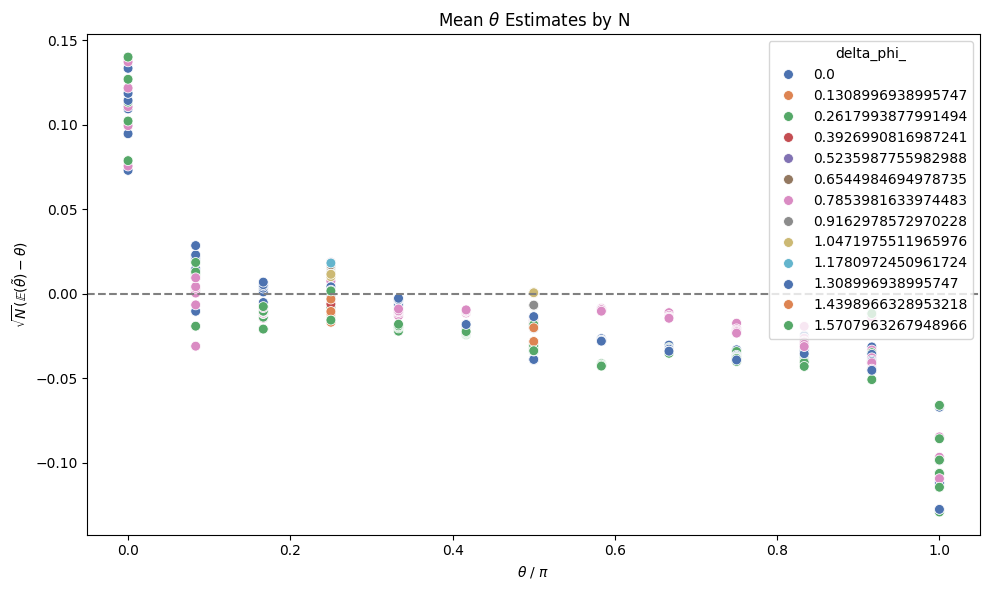

In [12]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=theta_estimates["theta_"] / np.pi,
    y=(theta_estimates["theta_estimate_mean"] - theta_estimates["theta_"])
    #* np.sqrt(
    #    theta_estimates["N_"]
    #)
    ,
    hue=theta_estimates["delta_phi_"],
    # hue=theta_estimates["N_"],

    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} (\mathbb{E}(\tilde{\theta}) - \theta)$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

### Compensated

## Variance

### Without Theory

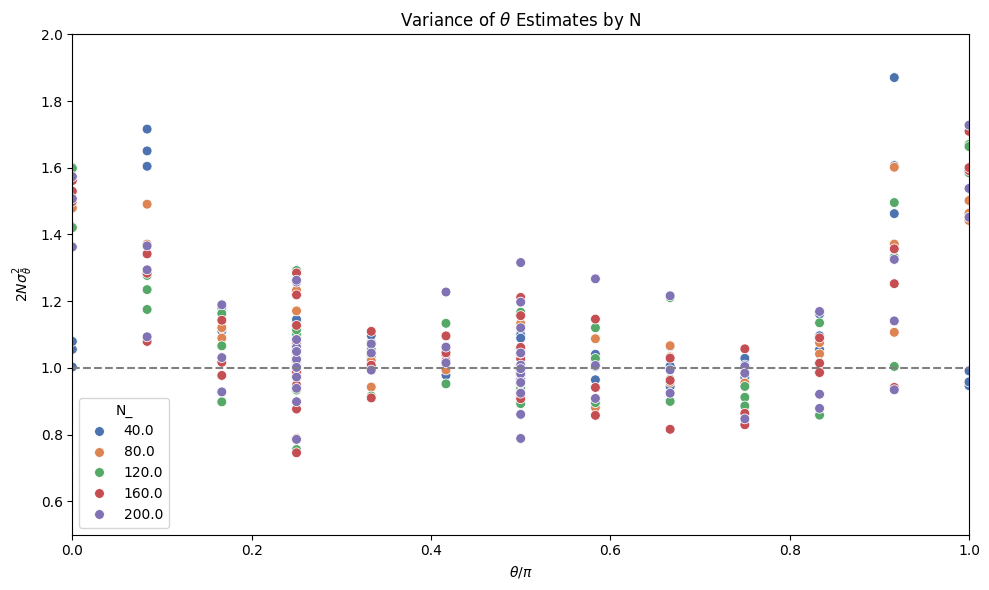

In [13]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### With Theory

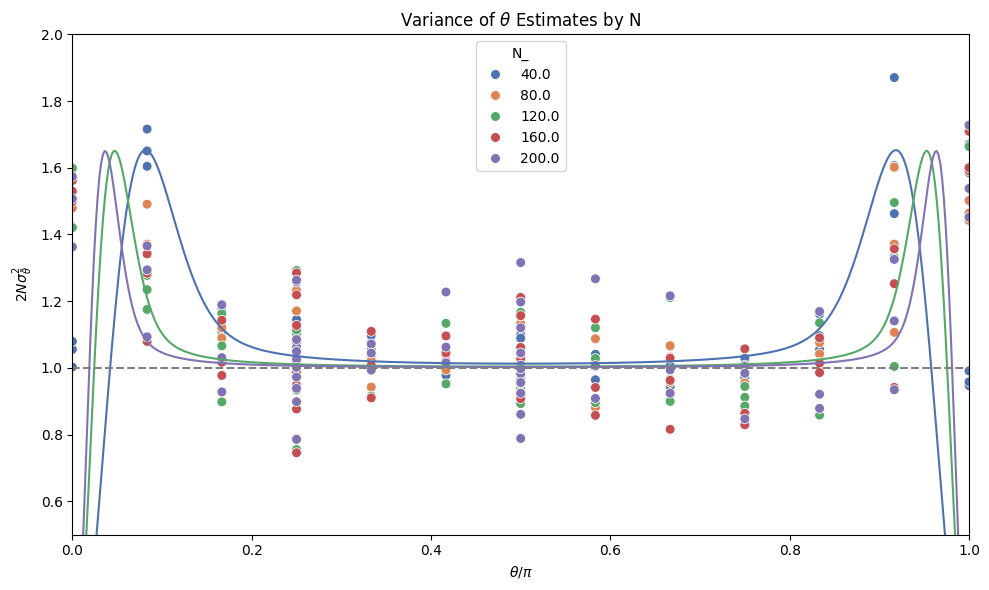

In [14]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))

N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

# Delta Phi

In [15]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,0.797728,0.046133,0.002128,665,0.072977,0.111957,0.012534
1,40.0,0.000000,0.785398,0.773960,0.086568,0.007494,674,0.075526,0.114872,0.013196
2,40.0,0.000000,1.570796,0.759506,0.063236,0.003999,693,0.078711,0.116158,0.013493
3,40.0,0.261799,0.000000,0.779083,0.147777,0.021838,662,0.251477,0.146455,0.021449
4,40.0,0.261799,0.785398,0.770504,0.124560,0.015515,681,0.230831,0.143638,0.020632
...,...,...,...,...,...,...,...,...,...,...
355,28400.0,2.356194,0.000000,0.788242,NaN,NaN,1,2.317071,NaN,NaN
356,28520.0,2.094395,0.000000,0.775088,NaN,NaN,1,2.060468,NaN,NaN
357,28560.0,0.785398,0.000000,0.800013,NaN,NaN,1,0.787524,NaN,NaN
358,28560.0,0.785398,1.570796,0.792778,NaN,NaN,1,0.787079,NaN,NaN


#### Theta = pi/2

In [16]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,1.570796,0.000000,0.782057,0.112834,0.012732,1401,1.553788,0.111634,0.012462
1,40.0,1.570796,0.130900,0.782882,0.121083,0.014661,703,1.550567,0.115225,0.013277
2,40.0,1.570796,0.261799,0.791357,0.118566,0.014058,700,1.552474,0.112290,0.012609
3,40.0,1.570796,0.392699,0.789126,0.120948,0.014628,674,1.553527,0.108624,0.011799
4,40.0,1.570796,0.523599,0.786976,0.117691,0.013851,678,1.555041,0.106641,0.011372
...,...,...,...,...,...,...,...,...,...,...
76,27960.0,1.570796,0.785398,0.786018,NaN,NaN,1,1.556597,NaN,NaN
77,28000.0,1.570796,0.261799,0.791494,NaN,NaN,1,1.552581,NaN,NaN
78,28120.0,1.570796,0.130900,0.782608,NaN,NaN,1,1.550703,NaN,NaN
79,28240.0,1.570796,0.000000,0.781327,NaN,NaN,1,1.557304,NaN,NaN


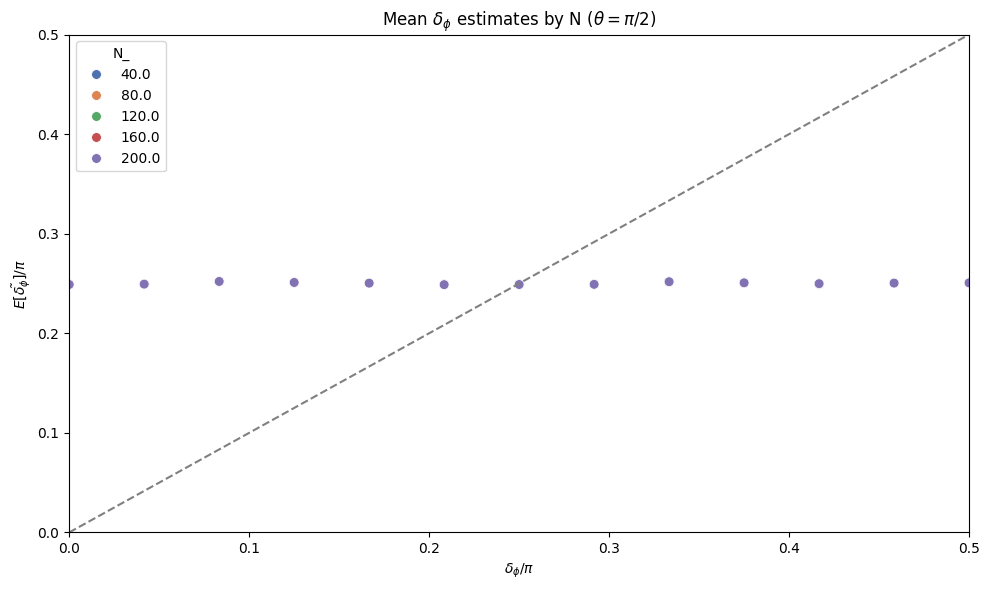

In [17]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

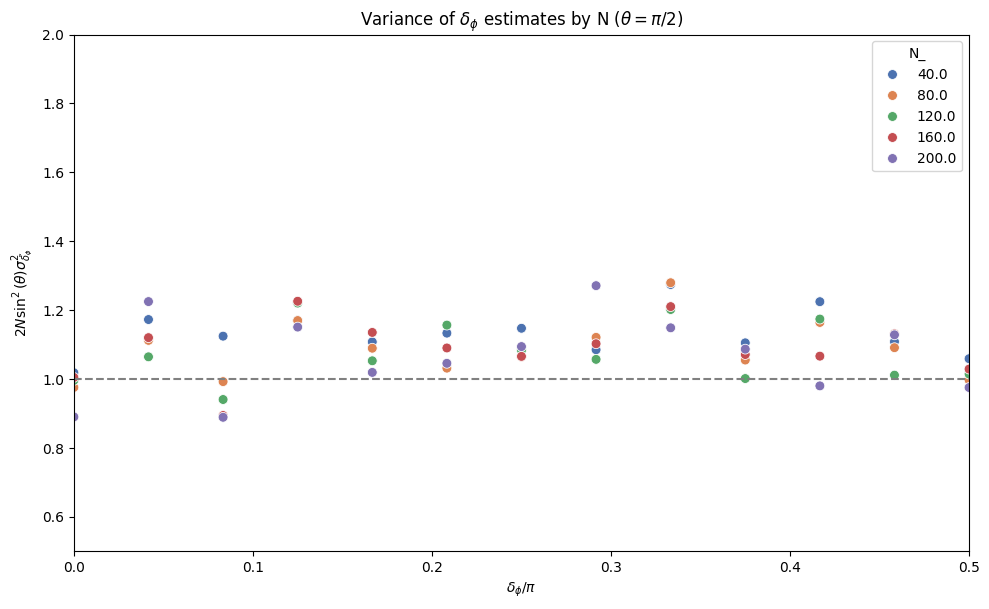

In [18]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1087727/4045133925.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


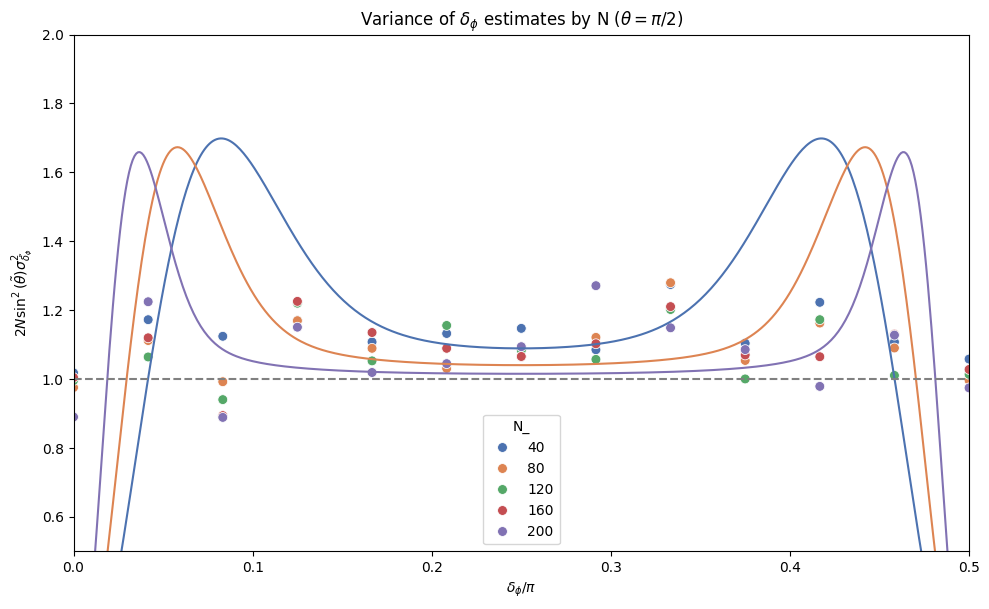

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Can be different subset
][delta_phi_theory["theta"] == np.pi / 2]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1087727/899911652.py:16: RuntimeWarning: divide by zero encountered in divide
  cramer_rao = 1 / fisher_information


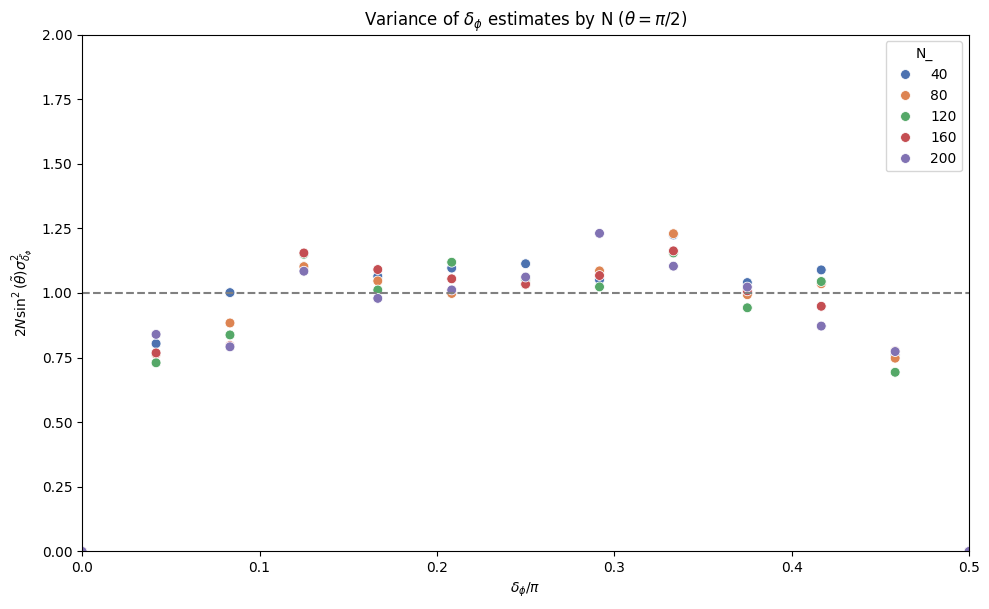

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Cramér-Rao bound data
eta = 0.985
delta_phi_range = np.linspace(0, np.pi / 2, 100)
fisher_information = (
    eta**2 * np.sin(2*delta_phi_range) ** 2 / (1 - eta**2 * np.cos(2*delta_phi_range) ** 2)
)
cramer_rao = 1 / fisher_information

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2),
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the cramér-rao bound
# sns.lineplot(
#     x=delta_phi_range / np.pi,
#     y=cramer_rao,
#     color="black",
#     label="Cramér-Rao Bound",
#     linestyle="--",
# )

plt.xlim(0, 1 / 2)
plt.ylim(0, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [21]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
9,40.0,0.785398,0.000000,0.791694,0.169916,0.028872,1407,0.781994,0.113816,0.012954
10,40.0,0.785398,0.130900,0.786979,0.172890,0.029891,701,0.775034,0.119139,0.014194
11,40.0,0.785398,0.261799,0.772940,0.171923,0.029557,685,0.779291,0.114823,0.013184
12,40.0,0.785398,0.392699,0.788753,0.170671,0.029129,678,0.772159,0.118288,0.013992
13,40.0,0.785398,0.523599,0.787085,0.174318,0.030387,669,0.778160,0.114516,0.013114
...,...,...,...,...,...,...,...,...,...,...
348,28040.0,0.785398,0.130900,0.785766,NaN,NaN,1,0.782280,NaN,NaN
349,28080.0,0.785398,1.439897,0.782618,NaN,NaN,1,0.774946,NaN,NaN
353,28320.0,0.785398,1.570796,0.778003,NaN,NaN,1,0.769859,NaN,NaN
357,28560.0,0.785398,0.000000,0.800013,NaN,NaN,1,0.787524,NaN,NaN


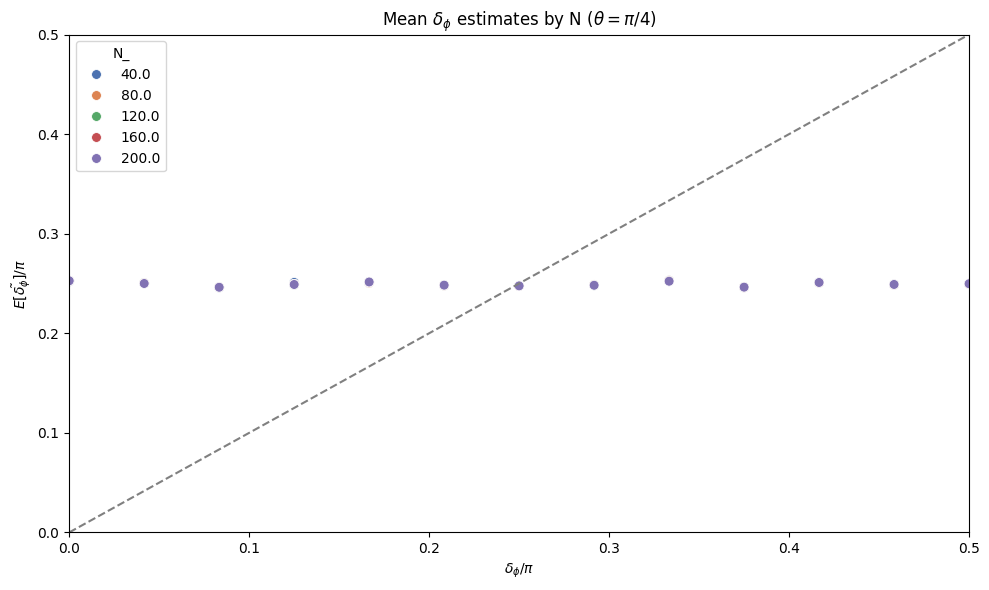

In [22]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

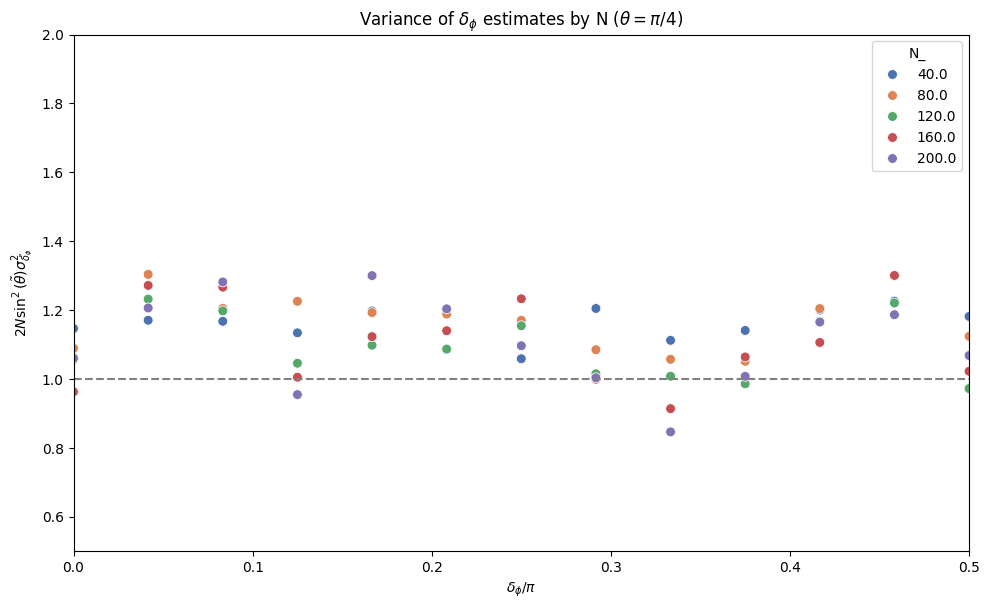

In [23]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"].isin([40, 80, 120, 160, 200])
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_var"]
    * 2
    * delta_phi_estimates_theta_pi_over_4["N_"]
    * np.sin(delta_phi_estimates_theta_pi_over_4["theta_estimate_mean"]) ** 2,
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1087727/2932750281.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


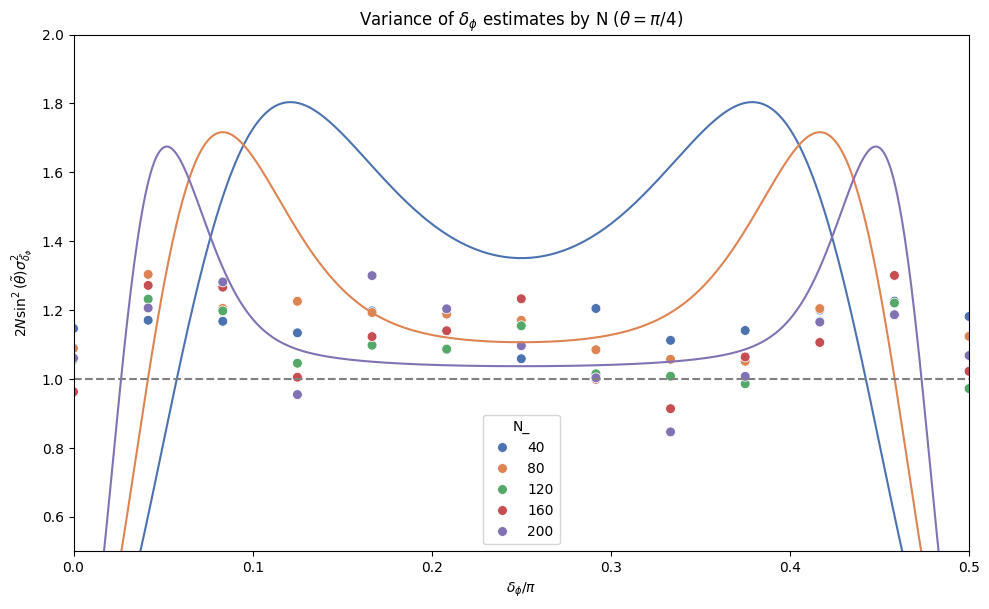

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Adjust if needed
][delta_phi_theory["theta"] == np.pi * 0.25]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"])
    ** 2,  # * 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()